## Imports

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_song_features.csv")

In [2]:
df.head()

,id,name,popularity,explicit,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,release_date,prime_artist
0,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,87,False,222973,0.00121,0.352,0.911,0.0000,1,0.0995,-5.230,1,0.0747,148.033,0.236,2004,The Killers
1,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,73,False,179640,0.00223,0.699,0.760,0.0000,5,0.1320,-3.173,1,0.0677,129.996,0.696,2008-06-17,Katy Perry
2,009ImBOrIUlWgla8U05RAC,Unconditionally,80,False,228879,0.00273,0.432,0.725,0.0000,7,0.2080,-4.862,1,0.0431,128.902,0.353,2013-01-01,Katy Perry
3,00cxhG668jV6gU6VK2FUVI,Acceptable in the 80's,59,False,333680,0.01430,0.787,0.808,0.2570,7,0.0466,-5.454,1,0.0511,127.990,0.942,2007-06-18,Calvin Harris
4,00FDHurakzVEiPutdUxXXq,Wouldn't It Be Good,66,False,277053,0.16900,0.655,0.705,0.0139,2,0.0698,-8.529,0,0.0285,97.007,0.749,1984-01-01,Nik Kershaw


In [3]:
df.describe()

,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,4923.000000,4.923000e+03,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000
mean,65.785903,2.441434e+05,0.198348,0.632847,0.664083,0.030310,5.331302,0.174339,-7.915290,0.660776,0.073072,119.782870,0.597858
std,10.558137,6.099893e+04,0.226246,0.148104,0.189570,0.121586,3.598293,0.142452,3.456382,0.473494,0.076354,26.747683,0.239210
min,1.000000,9.286700e+04,0.000005,0.135000,0.026400,0.000000,0.000000,0.015000,-24.709000,0.000000,0.022500,50.937000,0.037700
25%,58.000000,2.091600e+05,0.025900,0.541000,0.534000,0.000000,2.000000,0.083900,-10.032000,0.000000,0.032800,99.933000,0.412000
50%,66.000000,2.351330e+05,0.103000,0.646000,0.687000,0.000009,5.000000,0.119000,-7.203000,1.000000,0.043400,119.005000,0.617000
75%,74.000000,2.691730e+05,0.300000,0.739000,0.819000,0.001002,9.000000,0.223000,-5.281500,1.000000,0.073000,133.657000,0.799000
max,94.000000,1.561133e+06,0.978000,0.980000,0.999000,0.985000,11.000000,0.989000,-0.140000,1.000000,0.911000,210.857000,0.989000


## Preprocessing

In [226]:
# calculate duration in seconds and minutes
df["duration_seconds"] = df["duration_ms"].apply(lambda x: x // 1000)
df["duration_minutes"] = df["duration_ms"].apply(lambda x: x / 1000 / 60)

In [99]:
# convert multivalued realease_date into atomar fields
import regex as re

df["year"] = df["release_date"].apply(lambda x: x[:4]).apply(lambda x: int(x))

rows_len_10 = df["release_date"].apply(lambda x: len(x) == 10)

df["month"] = df[rows_len_10]["release_date"].apply(lambda x: re.search("\w{4}-(\w{2})-\w{2}", x).group(1)).apply(lambda x: int(x))

df["day"] = df[rows_len_10]["release_date"].apply(lambda x: re.search("\w{4}-\w{2}-(\w{2})", x).group(1)).apply(lambda x: int(x))


In [63]:
df[["release_date","year","month","day"]].head() # note all entries are strings

,release_date,year,month,day
0,2004,2004,NaN,NaN
1,2008-06-17,2008,06,17
2,2013-01-01,2013,01,01
3,2007-06-18,2007,06,18
4,1984-01-01,1984,01,01


In [18]:
np.sort(df["year"].unique())

array(['1967', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [66]:
df["year"].nunique()

56

In [56]:
df["month"].unique()

array([nan, '06', '01', '04', '10', '05', '03', '09', '02', '07', '11',
       '08', '12'], dtype=object)

In [64]:
df["month"].nunique()

12

In [57]:
df["day"].unique()

array([nan, '17', '01', '18', '13', '04', '28', '29', '27', '02', '06',
       '09', '14', '23', '24', '30', '10', '26', '20', '22', '25', '12',
       '15', '11', '31', '03', '08', '21', '19', '07', '05', '16'],
      dtype=object)

In [65]:
df["day"].nunique()

31

# Visualization

<AxesSubplot:xlabel='duration_minutes', ylabel='Count'>

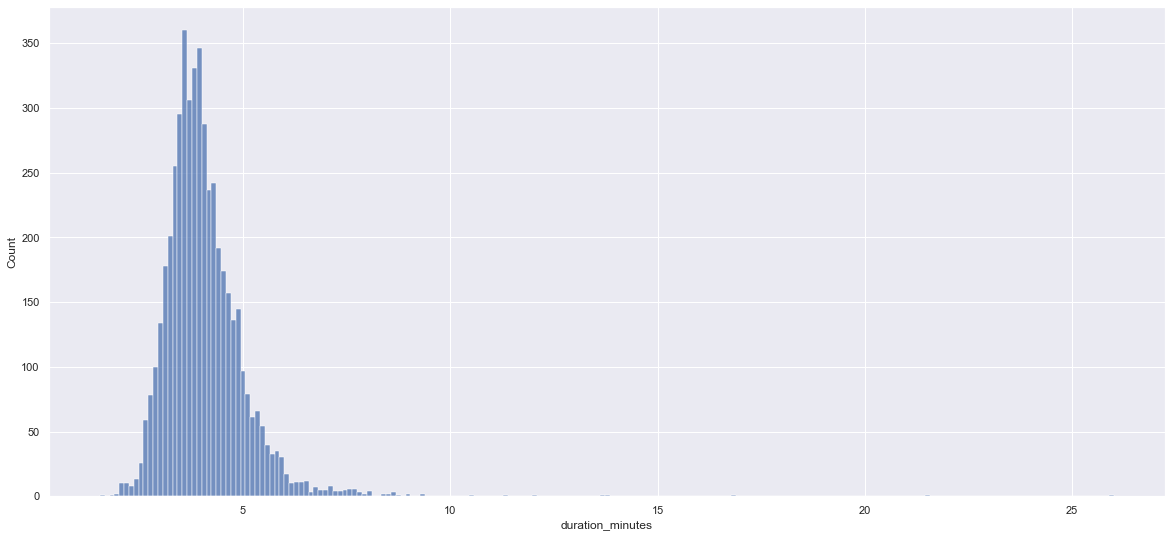

In [234]:
fig, ax = plt.subplots(figsize=(20,9))
sns.histplot(ax=ax, data=df, x="duration_minutes")

In [105]:
type(df.iloc[2]["month"])

numpy.float64

<AxesSubplot:xlabel='year', ylabel='duration_minutes'>

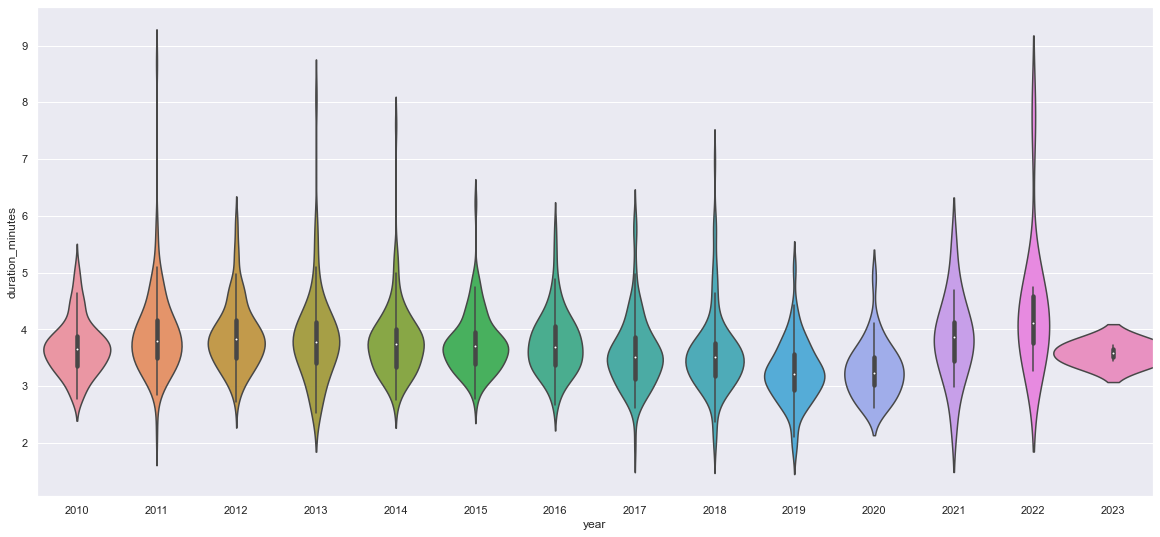

In [231]:
fig, ax = plt.subplots(figsize=(20,9))
sns.violinplot(ax=ax, data=df[df["year"]>= 2010],x="year",y="duration_minutes", width=1.5)

<AxesSubplot:xlabel='year'>

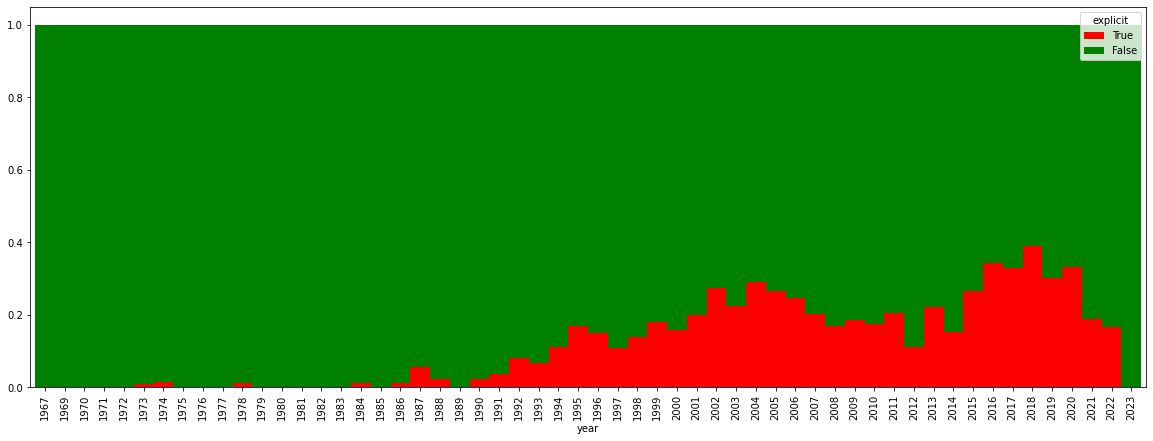

In [210]:
# plotting ratio of explicit songs by year
pd.crosstab(index=df['year'],columns=df["explicit"], normalize="index").loc[(slice(None), (True,False))].plot(kind="bar", stacked=True, color=["red","green"], figsize=(20,7), width=1)

<AxesSubplot:xlabel='year'>

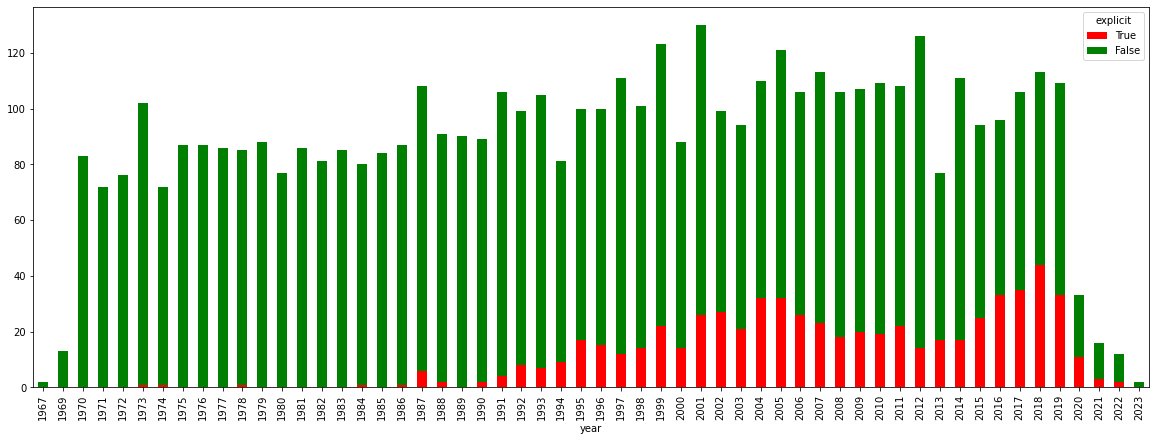

In [205]:
# plotting absolute count of explicit vs non-explicit songs by year
pd.crosstab(index=df['year'],columns=df["explicit"]).loc[(slice(None), (True,False))].plot(kind="bar", stacked=True, color=["red","green"], figsize=(20,7))